In [6]:
pip install -r requirements.txt

  Using cached python_dotenv-1.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached langchain_openai-0.3.11-py3-none-any.whl.metadata (2.3 kB)
  Using cached langchain_community-0.3.20-py3-none-any.whl.metadata (2.4 kB)
  Using cached bs4-0.0.2-py2.py3-none-any.whl.metadata (411 bytes)
  Using cached faiss_cpu-1.10.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (4.4 kB)
  Using cached pypdf-5.4.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached arxiv-2.1.3-py3-none-any.whl.metadata (6.1 kB)
  Using cached pymupdf-1.25.5-cp39-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (3.4 kB)
  Using cached wikipedia-1.4.0.tar.gz (27 kB)
  Preparing metadata (setup.py) ... done
  Using cached langchain_huggingface-0.1.2-py3-none-any.whl.metadata (1.3 kB)
  Using cached langchain_groq-0.3.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached langgraph-0.3.21-py3-none-any.whl.metadata (7.7 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/4

# **Parallelization**
- Parallel execution of nodes later combine all the nodes using aggregator function.

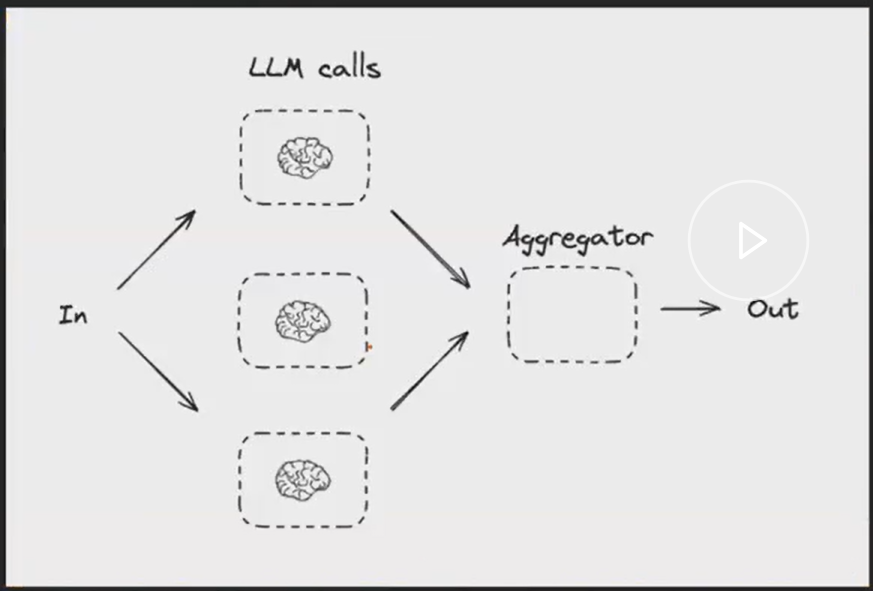

In [36]:
import os
from dotenv import load_dotenv
load_dotenv()
from typing import TypedDict
from langchain_groq import ChatGroq
from langgraph.graph import StateGraph, START, END

In [37]:
os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY')

In [ ]:
llm = ChatGroq(model='')

In [39]:
class State(TypedDict):
  topic: str
  joke: str
  story: str
  poem: str
  combined: str

In [40]:
# Nodes

def llm_call_joke(state: State):
  """ Here will generate the joke"""
  msg = llm.invoke(f"Write a joke about {state['topic']}")
  return {"joke": msg.content}

def llm_call_story(state: State):
  """ Here will Generate a story for the given topic"""
  msg = llm.invoke(f"Write a story about {state['topic']}")
  return {"story": msg.content}

def llm_call_poem(state: State):
  """ Here will Generate a poem for the topic given"""
  msg = llm.invoke(f"Write a poem about {state['topic']}")
  return {"poem": msg.content}

def aggregator(state: State):
  """This call is to combine all"""

  msg = llm.invoke(f"Combine the following: {state['joke']}, {state['story']}, {state['poem']}")
  return {"combined": msg.content}



In [41]:
builder = StateGraph(State)

builder.add_node("llm_call_joke", llm_call_joke)
builder.add_node("llm_call_story", llm_call_story)
builder.add_node("llm_call_poem", llm_call_poem)
builder.add_node("aggregator", aggregator)

In [42]:
builder.add_edge(START, "llm_call_joke")
builder.add_edge(START, "llm_call_story")
builder.add_edge(START, "llm_call_poem")
builder.add_edge("llm_call_joke", "aggregator")
builder.add_edge("llm_call_story", "aggregator")
builder.add_edge("llm_call_poem", "aggregator")
builder.add_edge("aggregator", END)

graph = builder.compile()

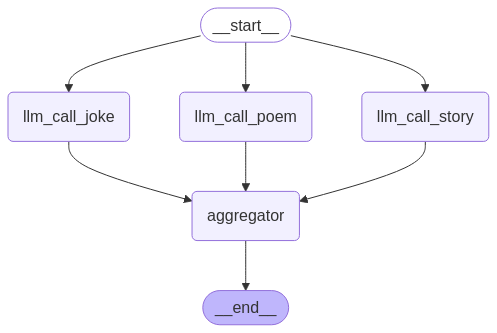

In [43]:
graph

In [45]:
state = graph.invoke({"topic": "Hanuman"})
print(state["combined"])

In the lush forests of Kishkindha, there lived a mighty monkey king named Sugriva, greatly troubled by his brother's treachery. Yet, Sugriva's heart was lightened by the presence of his most loyal advisor, Hanuman, the son of the wind god Vayu, known for his strength, agility, and unmatched intelligence.

One day, a prince named Rama and his brother, Lakshmana, sought refuge in Sugriva's kingdom. Rama needed help to find his wife, Sita, kidnapped by the powerful demon king Ravana. Sugriva saw an opportunity and decided to aid Rama in his quest. Hanuman, with his extraordinary abilities, was given the crucial task of leading the search party to find Sita.

While on their quest, the group heard that Sita was held captive on the island of Lanka. Hanuman, with a powerful leap, crossed the vast ocean to Lanka. After locating Sita and ensuring her that Rama was coming for her, Hanuman returned with a token of Sita's presence and the promise of Rama's rescue.

The subsequent battle against Ra